# **AISaturdays Airbnb Challenge**

![AISaturdays](https://www.saturdays.ai/assets/images/ai-saturdays-122x122.png)

Bienvenido al reto de **AISaturdays** de Inteligencia Artificial para la predicción de precios de rentals AirBnb en la zona de Nueva York. En este ejercicio estimaremos el precio de una oferta en AirBnb, dependiendo de unos datos.

**Instrucciones:**

- Se usará el lenguaje de programación Python 3.
- Se usarán las librerías de python: Pandas, MatPlotLib, Numpy.

**Mediante este ejercicio, aprenderemos:**
- Entender y ejecutar los NoteBooks con Python.
- Ser capaz de utilizar funciones de Python y librerías adicionales.
- Dataset:
 - Obtener el dataset y previsualizar la información del dataset.
 - Limpiar y normalizar la información del dataset.
 - Representar y analizar la información del dataset.
- Aplicar el algoritmo de Random Forest
- Mejorar la predicción usando Hyperparameter Tunning, Feature engineering y Gradient Boosting

¡Empecemos!


#1.Importación de librerias 

In [1]:
!pip install statsmodels

In [2]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
import scipy.stats as stats

#2. Dataset

0. Lee el .csv con los datos y muestra las primeras filas.

In [3]:
#Dos lineas de código
Combined_data = pd.read_csv('data.csv')
Combined_data.head()

,Unnamed: 0,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,price
0,35706,28341280,Bushwick Rustic Loft,10812370,Al,Brooklyn,Bushwick,40.69987,-73.91821,Private room,1,28,2019-07-07,2.75,1,36,69
1,2434,1213991,Private 2 bedroom Midtown Manhattan,6626827,Steve,Manhattan,Hell's Kitchen,40.76247,-73.99294,Private room,4,77,2019-06-19,1.81,1,21,240
2,44725,34372753,Spacious Manhattan Apartment,40038018,Yves,Manhattan,Midtown,40.76152,-73.97176,Entire home/apt,5,2,2019-06-09,1.00,1,132,449
3,32341,25311295,"★Modern,Cozy 3BDR/2BA Getaway in Upper East!",17896706,Mark,Manhattan,Upper East Side,40.77988,-73.95482,Entire home/apt,4,58,2019-06-18,4.26,1,158,399
4,9648,7411421,Hip & Trendy Williamsburg 2 BR 2BA Apartment,3750905,Louis,Brooklyn,Williamsburg,40.71303,-73.95580,Entire home/apt,2,28,2019-06-22,0.61,1,170,109


1. Muestra el numero de features y ejemplos en el dataset.

In [4]:
# Sólo con una línea de código
Combined_data.shape
#print('Number of features: {}'.format(Combined_data.shape[1]))
#print('Number of examples: {}'.format(Combined_data.shape[0]))

(32759, 17)

2. Obtén que tipos de datos (dtypes) contiene el dataset.

In [5]:
# Sólo con una línea de código
Combined_data.dtypes

Unnamed: 0                          int64
id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
price                               int64
dtype: object

### Variables



* **Id/name:**  Identificador y nombre de la oferta.

* **host_id/host_name:** Identificador y nombre del anfitrión.

* **neighbourhood_group/neighbourhood:** Zona y barrio de la oferta. Cada zona es una agrupación de barrios, por ejemplo: tanto Midtown como Harlem están en Manhattan.

* **latitude/longitude:** Latitud y longitud de la oferta.

* **room_type:** Que tipo de habitación se oferta. Puede ser el apartamento o casa entero, una habitación privada o una compartida.

* **minimum_nights:**  Noches de estancia mínima.

* **number_of_reviews:**  Número total de reviews de la oferta.

* **last_review:**  Fecha de la última review hecha.

* **reviews_per_month:** Número de reviews por mes. No siempre es entero y la mayoría son menos de 1.

* **calculated_host_listings_count:** Cuantas habitaciones tiene el host en oferta.

* **availability_365:** La disponibilidad de la oferta en un año: máximo de 365 (todo el año en oferta)

* **price:** ¡Nuestro objetivo!. El precio de la oferta, en dolares.



¿Es este un problema de regression o de classification? ¿Por que?:

3. Antes de analizar el dataset, tenemos que transformar las fechas (la feature last_review) en algo con lo que podamos trabajar. Pandas tiene un data type específicamente para esto, datetime. Transforma last_review a formato datetime.

In [6]:
# Sólo con una línea de código

#Combined_data['last_review'] = pd.to_datetime(Combined_data['last_review'],infer_datetime_format=True)
Combined_data['last_review'] = pd.to_datetime(Combined_data['last_review']) 

4. Para analizar los datos también necesitamos saber cuanta información nos falta. Utiliza isnull() para averiguar a que feature le faltan mas datos. 

In [7]:
# Sólo con una línea de código
Combined_data.isnull().sum().sort_values(ascending=False)

reviews_per_month                 6772
last_review                       6772
host_name                           17
name                                 4
price                                0
neighbourhood                        0
id                                   0
host_id                              0
neighbourhood_group                  0
longitude                            0
latitude                             0
availability_365                     0
room_type                            0
minimum_nights                       0
number_of_reviews                    0
calculated_host_listings_count       0
Unnamed: 0                           0
dtype: int64

5. Finalmente, solo nos falta deshacernos de las features que solo sirven de identificador y no ayudan a predecir.

In [8]:
# Sólo con una línea de código
Combined_data.drop(['host_name','name','host_id', 'id'], axis=1, inplace=True)

6. ¡Todo listo! Ya podemos analizar la distribución de los datos con la función .describe()

In [9]:
# Sólo con una línea de código
Combined_data.describe()

,Unnamed: 0,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,price
count,32759.000000,32759.000000,32759.000000,32759.000000,32759.000000,25987.000000,32759.000000,32759.000000,32759.000000
mean,24488.977350,40.728968,-73.952465,7.131475,23.240911,1.383150,7.223175,113.116090,154.312983
std,14106.247295,0.054479,0.045704,21.236959,44.354050,1.699714,33.275291,131.687842,256.571284
min,2.000000,40.499790,-74.240840,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,12270.500000,40.690150,-73.983130,1.000000,1.000000,0.190000,1.000000,0.000000,69.000000
50%,24455.000000,40.723180,-73.955800,3.000000,5.000000,0.730000,1.000000,45.000000,107.000000
75%,36745.500000,40.763155,-73.936540,5.000000,24.000000,2.030000,2.000000,226.000000,178.000000
max,48894.000000,40.913060,-73.712990,1250.000000,607.000000,58.500000,327.000000,365.000000,10000.000000


### Limpiar y normalizar la información del dataset
![texto alternativo](https://i.imgur.com/8u4xTI7.png)

Este dataset contiene información incompleta que debemos rellenar para poder usarla a la hora de predecir el precio de las ofertas.
También tenemos que transformar last_review si queremos incluirla en la predicción (no podemos utilizar una fecha como input directamente).

Para esta limpieza usaremos varias funciones de Pandas. Aquí teneis una [pista](https://new.paradigmadigital.com/wp-content/uploads/2019/02/Pandas_cheatsheet.pdf).

7. Encuentra el número de ofertas que por no tener reviews no tienen información en las columnas de last_review y reviews_per_month.

In [10]:
# Sólo con una línea de código
Combined_data[(Combined_data['number_of_reviews']== 0.0) & 
              (Combined_data['last_review'].isna()) & 
              (Combined_data['reviews_per_month'].isna())].shape

(6772, 13)

8. Tenemos que completar esta información si no queremos eliminar el resto del ejemplo. Rellena todos los NaNs de las reviews_per_month con 0 (Completaremos la columna de last_review después).

In [11]:
# Sólo con una línea de código 

Combined_data['reviews_per_month'] = Combined_data['reviews_per_month'].fillna(0)

9. Vamos a transformar la variable last_review. Es una fecha, lo cual nos hace dificil trabajar con ella. Vamos primero a completar los ejemplos que no tienen una última fecha. Reemplaza estos NaNs con la primera review histórica del dataset.

In [12]:
# Dos lineas de código 
earliest = min(Combined_data['last_review'])
Combined_data['last_review'] = Combined_data['last_review'].fillna(earliest)

10. Ahora que no tenemos valores vacios podemos cambiar la variable last_review a algo mas util. Buscamos que valores mas pequeños correspondan a reviews antiguas o que no hayan tenido ninguna, mientras que valores mas grandes correspondan a reviews mas recientes. 

Podemos utilizar la función toordinal() para hallar el número de dias que han transcurrido desde el dia 1 del año 1, pero esos siguen siendo números demasiado grandes que no siguen la distribución que buscamos.

Consigue que last_reviews pase a representar la cantidad de dias que han transcurrido desde que se hizo la primera review histórica. 

In [13]:
# Solo una línea de código
Combined_data['last_review'] = Combined_data['last_review'].apply(lambda x: x.toordinal()-earliest.toordinal())

11. Para visualizar la distribución de las fechas, genera una gráfica que muestre la variable last_reviews.

C:\Users\benat\anaconda3\envs\fastai\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='last_review', ylabel='Density'>

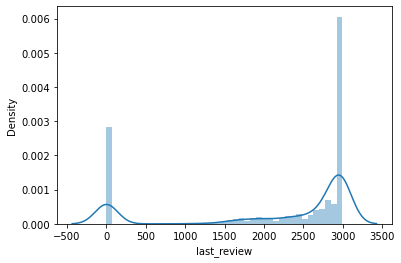

In [19]:
# Solo una línea de código
sns.distplot(Combined_data['last_review'])

Parece que hay dos grupos muy distinguidos. ¿A que se debe esta distribución?:

#### Estudio de la variable a predecir y eliminación de ruido

12. A la hora de predecir el precio, es mucho mas favorable si primero transformamos y analizamos la variable que buscamos para hacerla mas facil de predecir.

Primero, vamos a ver como el precio de las ofertas está distribuido. Genera una gráfica que muestre el precio de las ofertas. Aquí tienes una [Pista](https://seaborn.pydata.org/generated/seaborn.distplot.html).

C:\Users\benat\anaconda3\envs\fastai\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

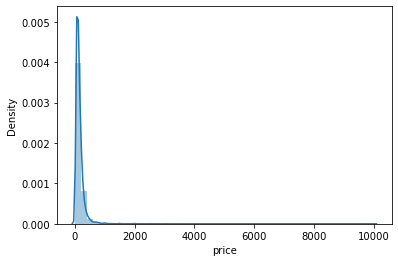

In [20]:
# Solo una línea de código.
sns.distplot(Combined_data['price'])

Tenemos una variable que sigue una distribución log-normal. Podemos transformarla en una distribución normal aplicando log1p(), una función que responde a la siguiente ecuación:

$ y = log(x+1) $

Esto hace que el precio sea mas facil de predecir, al tener una distribución normal.

13. Vamos a visualizar esta transformación. Genera otra gráfica de price tras aplicar la función log1p().

C:\Users\benat\anaconda3\envs\fastai\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

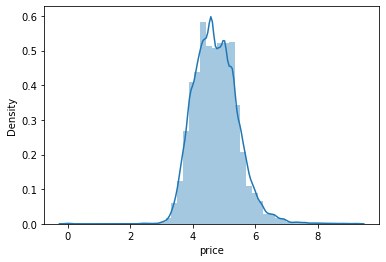

In [21]:
#Solo una línea de código
sns.distplot(np.log1p(Combined_data['price']))

Ahora tenemos una distribución mucho mas apropiada para hacer predicciones. Sin embargo, todavía quedan muchos outliers que añaden ruido a la muestra.

14. ¿Por encima y debajo de qué valores esta presente este ruido?. Elimina del dataframe aquellos valores que no entren en la distribución normal.

In [22]:
#Dos lineas de código
Combined_data = Combined_data[np.log1p(Combined_data['price']) < 8]
Combined_data = Combined_data[np.log1p(Combined_data['price']) > 3]

14. Ahora, vuelve a generar la gráfica de precio y log1p del precio (usa el mismo código que antes, o ponlo en un [subplot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplots.html)).

C:\Users\benat\anaconda3\envs\fastai\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\benat\anaconda3\envs\fastai\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'log(1+price)')

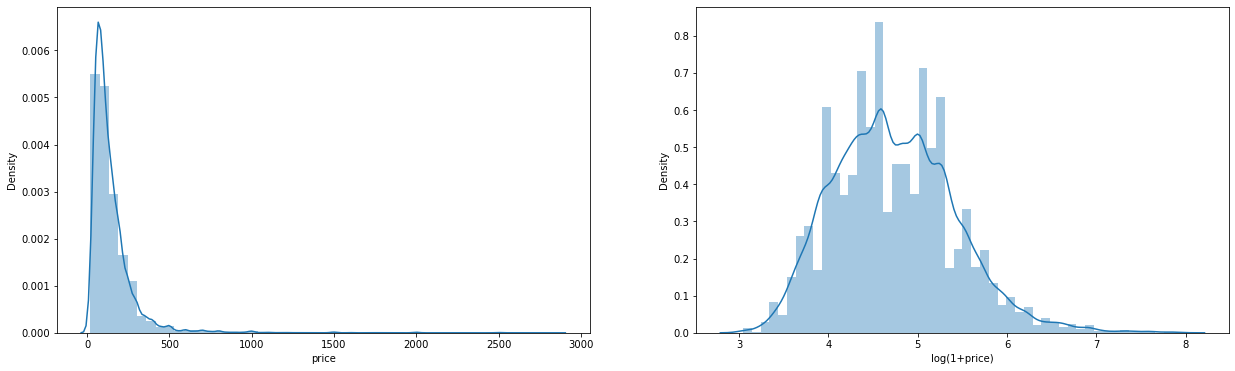

In [23]:
#Cuatro lineas de código
fig, axes = plt.subplots(1,2, figsize=(21,6))
sns.distplot(Combined_data['price'], ax=axes[0])
sns.distplot(np.log1p(Combined_data['price']), ax=axes[1])
axes[1].set_xlabel('log(1+price)')

15. Finalmente, tenemos una variable de salida normalizada y sin ruido que mejorará nuestras predicciones. Cambia la variable price por el log1p de price.


In [24]:
#Solo una línea de código
Combined_data['price'] = np.log1p(Combined_data['price'])

#### Exploración de variables


Vamos a explorar un poco mas el resto de variables que pueden afectar al precio de una oferta. 

16. Empecemos por crear un histograma de las distintas zonas de Nueva York y la cantidad de ofertas en cada una de ellas (a lo mejor necesitas ampliar el gráfico)

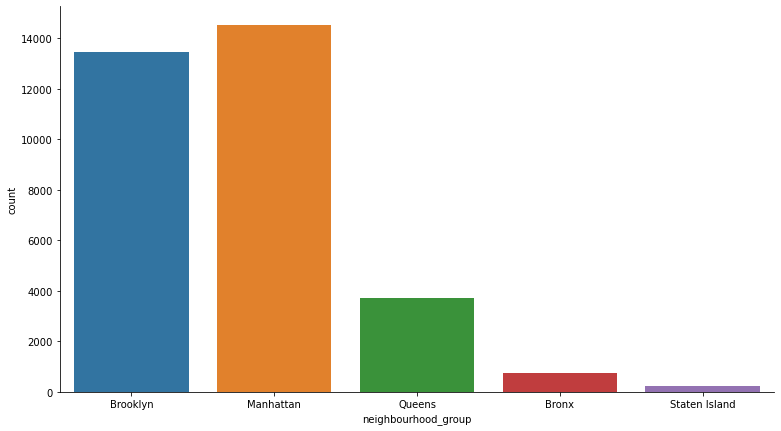

In [25]:
#Tres lineas de código
sns.catplot(x='neighbourhood_group', kind='count' ,data=Combined_data)
fig = plt.gcf()
fig.set_size_inches(12, 6)

17. Ahora crea un mapa de los apartamentos ofertados con la latitud y longitud (puntos extra si los coloreas por zonas o barrios). Lo mejor es hacerlo en un subplot y así puedes controlar el tamaño del mapa.

<AxesSubplot:xlabel='latitude', ylabel='longitude'>

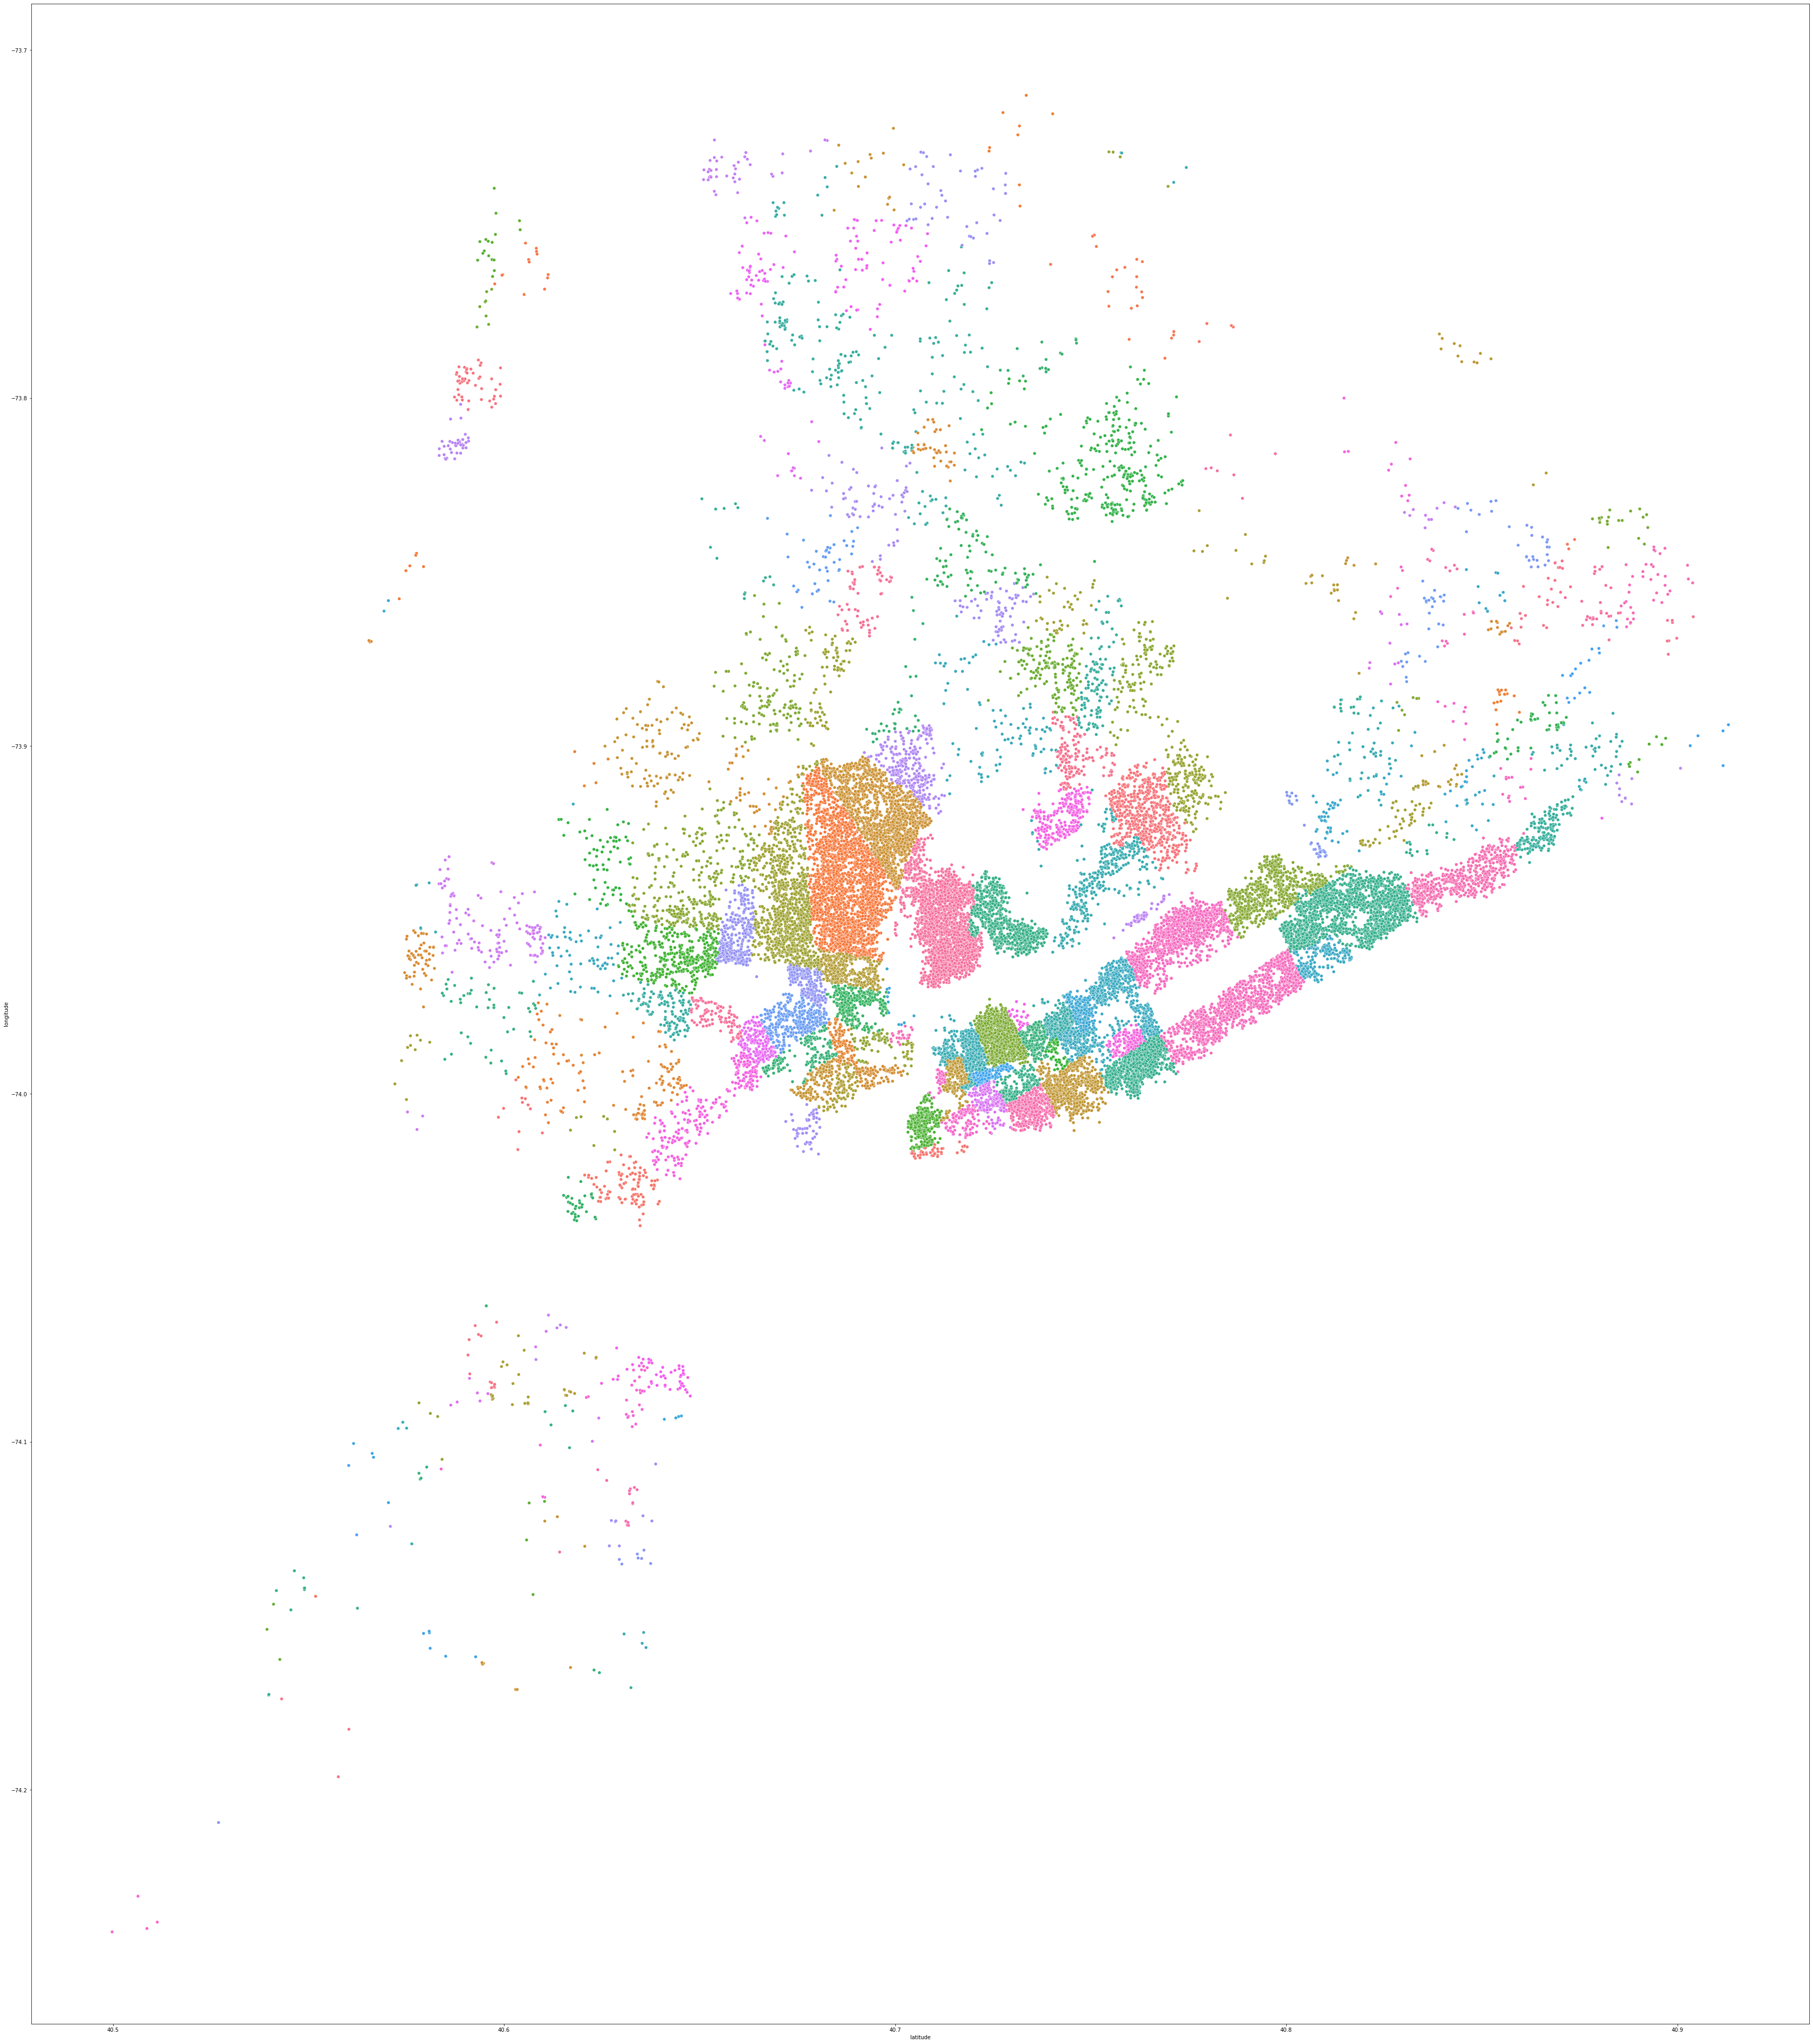

In [26]:
#Dos lineas de código
fig, axes = plt.subplots(1, figsize=(60,70))
sns.scatterplot(x= Combined_data['latitude'], y=Combined_data['longitude'],hue= Combined_data['neighbourhood'].astype('category'),legend = False, ax = axes)

18. Vamos ahora a generar otro histograma, esta vez con el tipo de habitación ofertado (También es buena idea ajustar el tamaño de la gráfica).

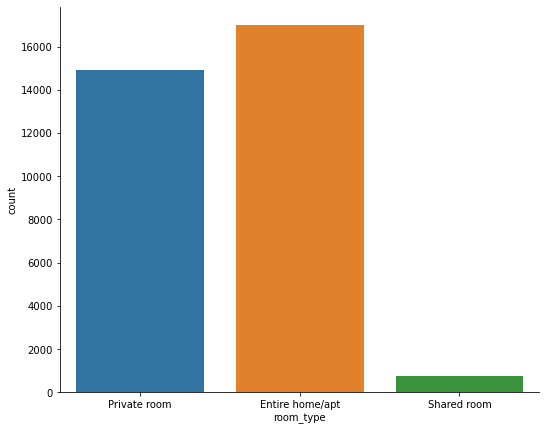

In [27]:
#Tres lineas de código
sns.catplot(x='room_type', kind='count' ,data=Combined_data)
fig = plt.gcf()
fig.set_size_inches(8, 6)

#### Transformación de variables

Podemos aplicar el mismo proceso que le aplicamos a la variable price a nuestras variables de entrada y así conseguir una distribución mas cómoda para los métodos de busqueda.

19. Aplica la transformación log1p() a minimum_nights, generando las gráficas antes y despues y compáralas. 

C:\Users\benat\anaconda3\envs\fastai\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'count in log scale')

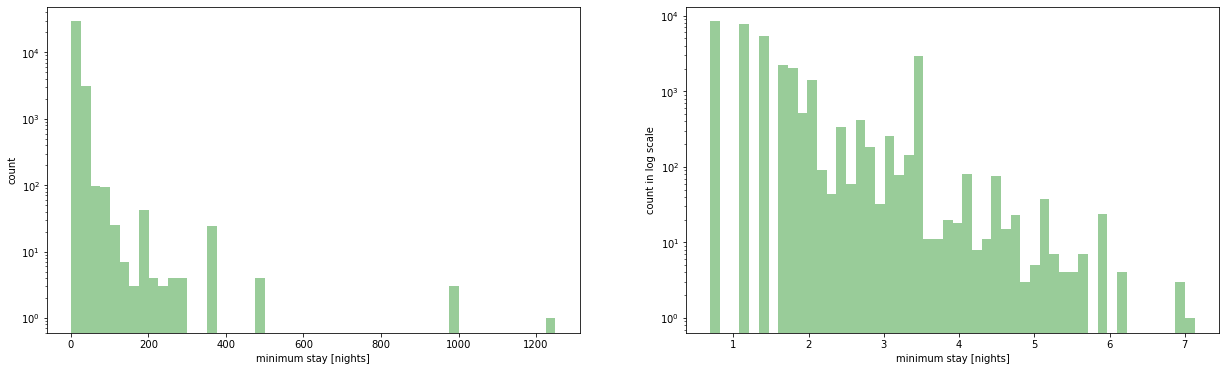

In [28]:
#Tres lineas de código
fig, axes = plt.subplots(1,2, figsize=(21, 6))

sns.distplot(Combined_data['minimum_nights'], rug=False, kde=False, color="green", ax = axes[0])
axes[0].set_yscale('log')
axes[0].set_xlabel('minimum stay [nights]')
axes[0].set_ylabel('count')

sns.distplot(np.log1p(Combined_data['minimum_nights']), rug=False, kde=False, color="green", ax = axes[1])
axes[1].set_yscale('log')
axes[1].set_xlabel('minimum stay [nights]')
axes[1].set_ylabel('count in log scale')

20. Finalmente, guarda minimum_nights como log1p de minimum_nights

In [29]:
#Solo una línea de código.
Combined_data['minimum_nights'] = np.log1p(Combined_data['minimum_nights'])

21. Repite el proceso, esta vez con reviews_per_month. ¿Es relevante la transformación?

C:\Users\benat\anaconda3\envs\fastai\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\benat\anaconda3\envs\fastai\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\benat\anaconda3\envs\fastai\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\benat\anaco

Text(0.5, 0, 'ln(reviews_per_month)')

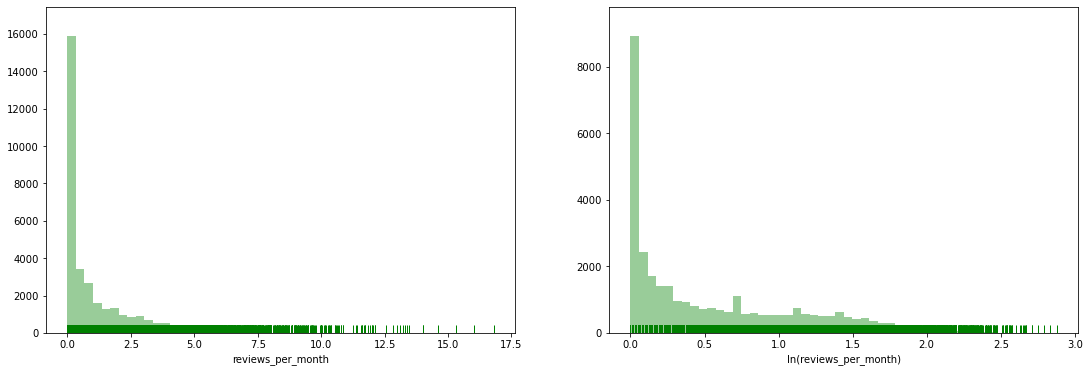

In [30]:
#Tres lineas de código.
fig, axes = plt.subplots(1,2,figsize=(18.5, 6))
sns.distplot(Combined_data[Combined_data['reviews_per_month'] < 17.5]['reviews_per_month'], rug=True, kde=False, color="green", ax=axes[0])
sns.distplot(np.log1p(Combined_data[Combined_data['reviews_per_month'] < 17.5]['reviews_per_month']), rug=True, kde=False, color="green", ax=axes[1])
axes[1].set_xlabel('ln(reviews_per_month)')

#### Estudio de la disponibilidad en número de dias (0,365)

22. Vamos a empezar representando la disponibilidad en un distplot(). Como conocemos los limites de esta variable, lo mejor es limitar el intervalo de la gráfica y hacerla mas grande.


C:\Users\benat\anaconda3\envs\fastai\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 365.0)

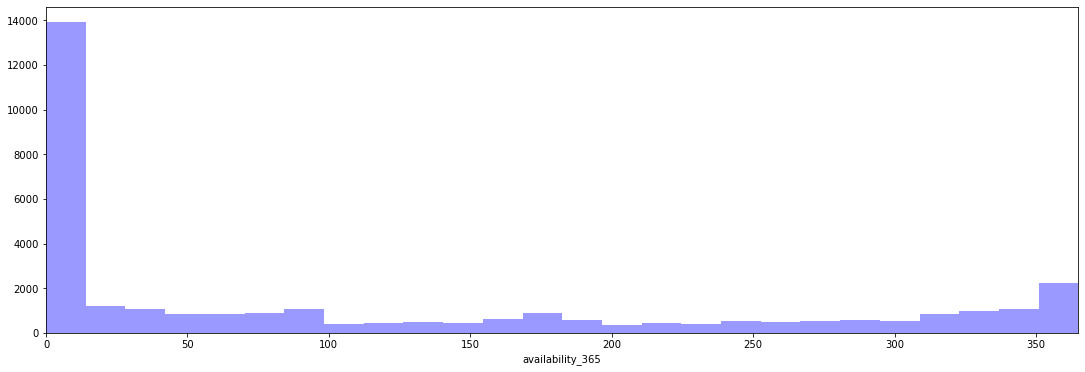

In [31]:
#Cuatro lineas de código.
fig, axes = plt.subplots(1,1,figsize=(18.5, 6))
sns.distplot(Combined_data['availability_365'], rug=False, kde=False, color="blue", ax=axes)
axes.set_xlabel('availability_365')
axes.set_xlim(0, 365)

#### Añadir variables artificiales

Se ha visto en el scatterplot anterior que parece haber dos grupos, uno disponible la mayor parte del año y otro solo unos pocos dias.

También se intuye que aquellos sitios que no tengan reviews... Como que no dan mucha confi no? ;)

23. Añade tres categorias que midan si el apartamento está disponible todo el año, si su disponibilidad es muy baja (menor de 12 dias al año), y si no tiene reviews.

In [32]:
#Tres lineas de código
Combined_data['all_year_avail'] = Combined_data['availability_365']>353
Combined_data['low_avail'] = Combined_data['availability_365']< 12
Combined_data['no_reviews'] = Combined_data['reviews_per_month']==0

24. Vamos a generar un heatmap que muestre la relación entre todas las variables de entrada y price. Utiliza corr() y la función heatmap() de seaborn.

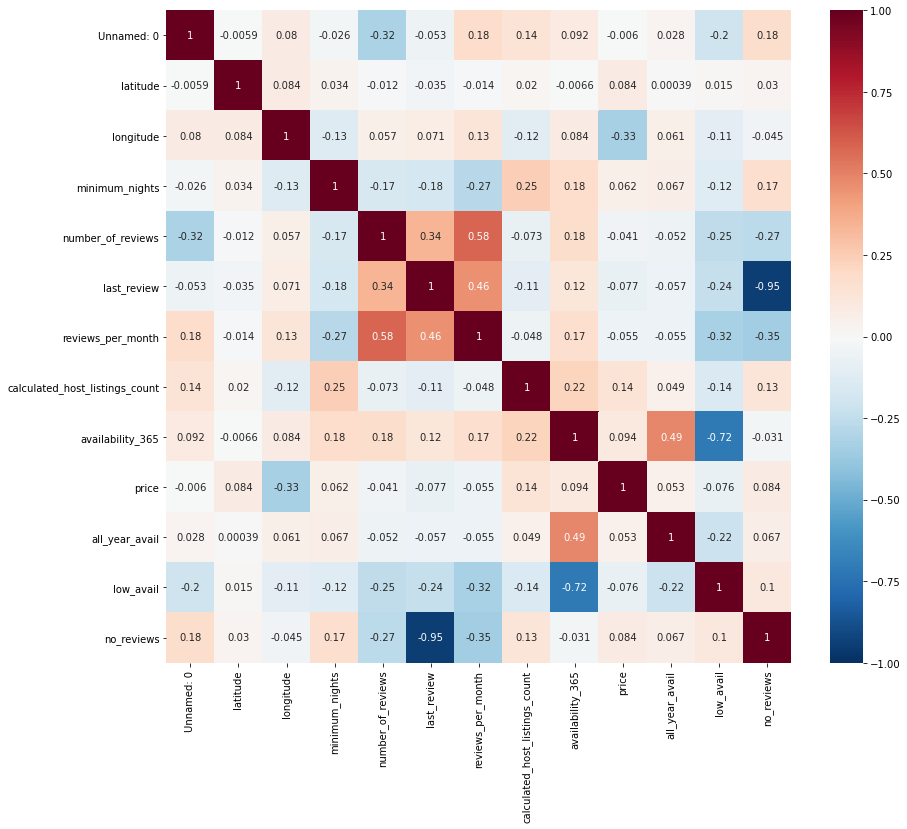

In [33]:
#Tres lineas de código
plt.figure(figsize=(14, 12))
crr = Combined_data.corr()
heatmap = sns.heatmap(crr, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")

#### Pasar variables categóricas a one_hot


25. Para hacer las features categóricas mas fáciles de interpretar por el modelo, vamos a transformarlas en un OneHotEncoding. Utiliza la función get_dummies() de pandas (te deberían de quedar 241 columnas)

In [34]:
#Dos lineas de código
categorical_features_one_hot = pd.get_dummies(Combined_data)
categorical_features_one_hot.head()

,Unnamed: 0,latitude,longitude,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,price,...,neighbourhood_Whitestone,neighbourhood_Williamsbridge,neighbourhood_Williamsburg,neighbourhood_Windsor Terrace,neighbourhood_Woodhaven,neighbourhood_Woodlawn,neighbourhood_Woodside,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,35706,40.69987,-73.91821,0.693147,28,2995,2.75,1,36,4.248495,...,0,0,0,0,0,0,0,0,1,0
1,2434,40.76247,-73.99294,1.609438,77,2977,1.81,1,21,5.484797,...,0,0,0,0,0,0,0,0,1,0
2,44725,40.76152,-73.97176,1.791759,2,2967,1.00,1,132,6.109248,...,0,0,0,0,0,0,0,1,0,0
3,32341,40.77988,-73.95482,1.609438,58,2976,4.26,1,158,5.991465,...,0,0,0,0,0,0,0,1,0,0
4,9648,40.71303,-73.95580,1.098612,28,2980,0.61,1,170,4.700480,...,0,0,1,0,0,0,0,1,0,0


# Modelos, modelos, modelos

Hecha toda la exploración, análisis y limpieza de datos, pasamos a la parte divertida: ¡Los modelos!
    
Empezamos importando todas las clases que vamos a necesitar para encontrar un buen modelo predictivo:

In [35]:
from sklearn.model_selection import train_test_split,cross_val_score,  GridSearchCV, KFold, StratifiedKFold, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

26. Divide el dataset en X_train, X_test, y_train y y_test utilizando train_test_split(). No te olvides de no incluir price en el training set.

In [36]:
#Tres lineas de código
y = categorical_features_one_hot.price
X = categorical_features_one_hot.drop(['price'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


27. Vamos a utilizar cross_validation para entrenar nuesto modelo, utilizando Kfold para hayar la score. Implementa un Kfold que realize 5 splits y calcula el error medio y la desviación de un RandomForestRegressor sin cambiar sus parámetros (todavía). [Pista](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html).

In [37]:
#Tres lineas de código
kf = KFold(5, shuffle=True, random_state = 42).get_n_splits(categorical_features_one_hot)
result = cross_val_score(RandomForestRegressor(), X_train, y_train, scoring='neg_mean_squared_error', cv=kf,n_jobs=-1)
print('Modelo {}: Error medio y desviación {:.5f} +/- {:5f}'.format(RandomForestRegressor.__name__, -result.mean(), result.std()))

Modelo RandomForestRegressor: Error medio y desviación 0.17808 +/- 0.004010


28. Al utilizar un RandomForestRegressor, ¿que hiperparámetros estabamos utilizando?. Lista todos los parámetros que utiliza este modelo (utiliza la función get_params() y la librería pprint)

In [38]:
from pprint import pprint
#Dos lineas de código
rf = RandomForestRegressor(random_state=42)
print('Parameters currently in use: \n')
pprint(rf.get_params())

Parameters currently in use: 

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


Podemos ajustar todos estos paámetros para mejorar la exactitud de nuestro modelo. Una forma de encontrar que combinación funciona mejor es utilizar un GridSearchCV, que prueba modelos con muchas combinaciones distintas y calcula su score para encontrar el mejor modelo a fuerza bruta. Para esto, hay que pasar una lista de valores para cada parámetro, y GridSearchCV probará con todos. [Mas información](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

29. Delimita que valores quieres que cada parámetro tenga, y incluye cada una de estas listas en un diccionario para poder ejecutar el GridSearchCV. Ten en cuenta los valores posibles para cada uno de los parámetros.

# 8 lineas de código

In [39]:
n_estimators = [int(x) for x in np.linspace(start = 10, stop=1000,num=10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
min_samples_split = [2,5,10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
        'max_features': max_features,
        'max_depth': max_depth,
        'min_samples_split': min_samples_split,
        'min_samples_leaf': min_samples_leaf,
        'bootstrap': bootstrap}

30. Ahora ya podemos implementar un GridSearchCV. Para hacerlo mas rápido, se utiliza una versión que no prueba con todas las combinaciones posibles, sino con unas cuantas de forma aleatorias (de ahí su nombre, RandomizedSearchCV). Impleméntalo, teniendo en cuenta que tiene como parámetros el modelo a ajustar y el diccionario que hemos definido antes, entre otros. Este paso puede durar unos minutos, ya que tiene que ajustar muchos modelos para encontrar el mejor. Aquí está la [documentación](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html) del RandomizedSearchCV.

In [40]:
#Dos lineas de código
rf_random = RandomizedSearchCV(estimator=rf, param_distributions = random_grid, n_iter=10, cv = 3, verbose=2, random_state=42, n_jobs=-1)
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed:  4.3min remaining:  1.3min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  8.1min finished


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 120, 230, 340, 450,
                                                         560, 670, 780, 890,
                                                         1000]},
                   random_state=42, verbose=2)

31. Para terminar, encuentra el mean squared error y $R^2$ del mejor modelo que hayas creado. 

In [41]:
#Seis lineas de código
y_pred_train = rf_random.predict(X_train)
y_pred_test = rf_random.predict(X_test)
print("MSE Train", mean_squared_error(y_train, y_pred_train))
print("MSE Test", mean_squared_error(y_test, y_pred_test))
print("R2 Train", r2_score(y_train, y_pred_train))
print("R2 Test", r2_score(y_test, y_pred_test))

MSE Train 0.07138016290443198
MSE Test 0.1777258649284078
R2 Train 0.8443693393970425
R2 Test 0.6216591074215443


Ahora, ¡a mejorar esa score!
Puedes probar a:
- Eliminar features que no sean relevantes para la predicción
- Implementar Gradient boosting utilizando XGBoost o Adaboost, entre otros
- Ajustar los hiperparámetros manualmente para llegar a mejores modelos
- Utilizar un Tree Interpreter para ver qué árboles de decisión tienen mas importancia

Al acabar el challenge, os daremos un validation set para ver quién de vosotros ha conseguido la mejor score.